## Multivariate regression - some aspects

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Genereate random samples

We start by generating random values with a defined covariance:

In [26]:
np.random.seed(12345)
samples = np.random.multivariate_normal([0,0], [[1,0.5],[0.5,1]], size=(100))
samples_perfect = np.random.multivariate_normal([0,0], [[1,0.9999],[0.9999,1]], size=(100))

(-2.668227833039547,
 3.2521702219556987,
 -3.6226588987881319,
 2.9416387732828566)

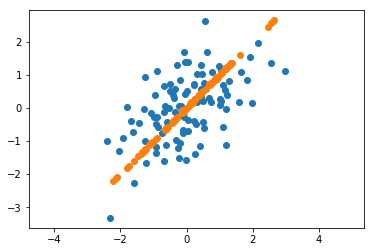

In [27]:
plt.plot(samples[:,0], samples[:,1], 'o')
plt.plot(samples_perfect[:,0], samples_perfect[:,1], 'o')
plt.axis('equal')

We observe a clear corrleation between these two variables! One way to estimate the correlation is the calculation of the correlation coefficient "r":

In [29]:
print("Scattered data: %.3f" % np.corrcoef(samples[:,0], samples[:,1])[0,1])
print("Perfect line: %.3f" % np.corrcoef(samples_perfect[:,0], samples_perfect[:,1])[0,1])


Scattered data: 0.541
Perfect line: 1.000


An important note of caution here: the interpretation of the value alone can be misleading! Here some nice examlpes of correlations where the coefficient itself may or may not provide a meaningful answer:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/800px-Correlation_examples2.svg.png">

### Interpretation

The obvious interpretation: the higher the covariance (or, as a scaled measure, the correlation), the more we can say about one variable when knowing anohter!

## Extension to multivariate regression

Based on this interpretation, the extension to multivariate regression is straight-forward:

In [45]:
# take same mean values and covariances for all:
means = 0.
covs = 0.5
n = 3 # number of variables
n_samples = 100
cov_matrix = np.ones((n,n)) * covs * (np.ones((n,n)) - np.eye(n)) + np.eye(n)
samples_mvar = np.random.multivariate_normal(np.ones(n) * means, cov_matrix, size=(n_samples))

In [46]:
# Estimated covariance matrix:
cov_mat_est = 1/n_samples * (samples_mvar.T @ samples_mvar)
cov_mat_est

array([[ 1.06165883,  0.55293505,  0.42877133],
       [ 0.55293505,  1.09065037,  0.49443099],
       [ 0.42877133,  0.49443099,  0.84292151]])